# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [7]:
json_df = pd.read_json('data/world_bank_projects.json')
json_data = json.load((open('data/world_bank_projects.json')))

## Explore data for Problem 1 - Top 10 Countries with most projects

In [8]:
json_df[['countrycode','project_name']].head(2)

,countrycode,project_name
0,ET,Ethiopia General Education Quality Improvement...
1,TN,TN: DTF Social Protection Reforms Support


## Top 10 Country Names with most projects

In [9]:
top10_country_df = json_df['countryname'].value_counts().nlargest(10)
top10_country_df.head()

Republic of Indonesia            19
People's Republic of China       19
Socialist Republic of Vietnam    17
Republic of India                16
Republic of Yemen                13
Name: countryname, dtype: int64

Text(0, 0.5, 'Project Counts')

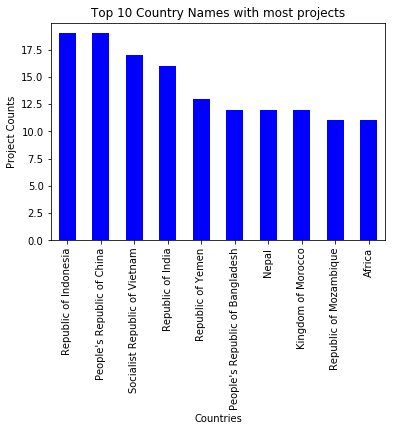

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

bar_chart1 = top10_country_df.plot(kind='bar',legend=None,title='Top 10 Country Names with most projects',color='b')
bar_chart1.set_xlabel('Countries')
bar_chart1.set_ylabel('Project Counts')

## Explore Data for Problem 2 - Top 10 Project themes

In [11]:
json_df['mjtheme_namecode'].head(2)
#multilevel json imported as dict objects, need to normalize as shown in above examples

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
Name: mjtheme_namecode, dtype: object

In [12]:
##not including missing values for counting themes, null theme counts don't have much value.
normalized_df = json_normalize(json_data, 'mjtheme_namecode')

## Top 10 major project themes

In [13]:
themes_nonnull_df = normalized_df.name[normalized_df.name != ""].value_counts().nlargest(10)

Text(0, 0.5, 'Counts')

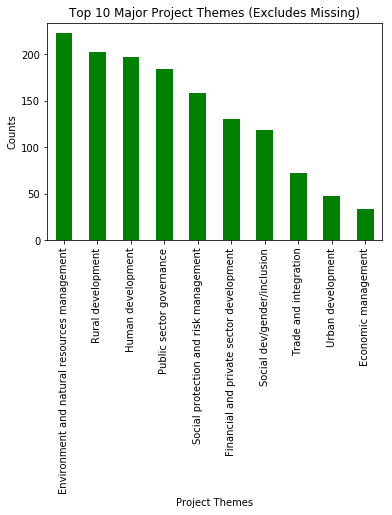

In [14]:
bar_chart2 = themes_nonnull_df.plot(kind='bar',legend=None,title='Top 10 Major Project Themes (Excludes Missing)',color='g')
bar_chart2.set_xlabel('Project Themes')
bar_chart2.set_ylabel('Counts')

##  Missing names filled by codes

In [15]:
distinct_df = normalized_df[normalized_df.name != ""].drop_duplicates().set_index('code').sort_values('code').head(11)

In [16]:
merged_df = pd.merge(normalized_df, distinct_df , on='code',suffixes=('_1','')).drop('name_1' ,axis=1)

In [22]:
final_cleaned_df = merged_df['name'].value_counts()

Text(0, 0.5, 'Counts')

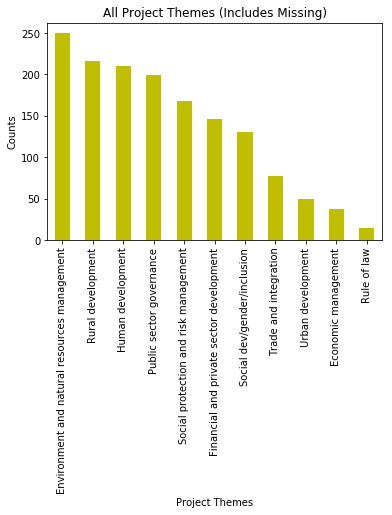

In [23]:
bar_chart3 = final_cleaned_df.plot(kind='bar',legend=None,title='All Project Themes (Includes Missing)',color='y')
bar_chart3.set_xlabel('Project Themes')
bar_chart3.set_ylabel('Counts')